In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\E\Downloads\titanic_dataset.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# ‘PassengerId’ as the index column


In [4]:
data=pd.read_csv(r'C:\Users\E\Downloads\titanic_dataset.csv',index_col='PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Fill in all the missing values present in all the columns in the dataset


In [9]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [10]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
data['Cabin']=data['Cabin'].fillna('unknown')

In [12]:
data['Embarked'].mode()[0]

'S'

In [13]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [14]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Check and handle outliers

Text(0.5, 1.0, 'Box plot of Pclass column')

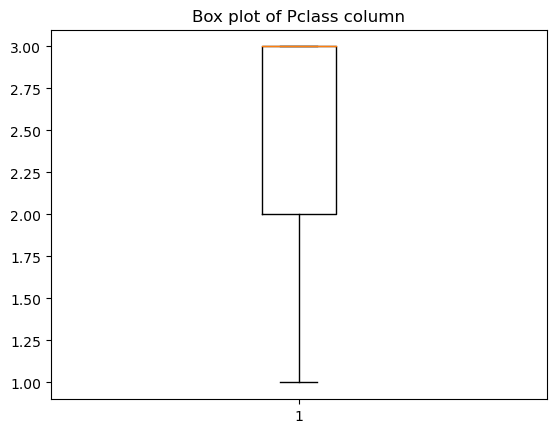

In [15]:
plt.boxplot(data['Pclass'])
plt.title('Box plot of Pclass column')

Text(0.5, 1.0, 'Box plot of Age')

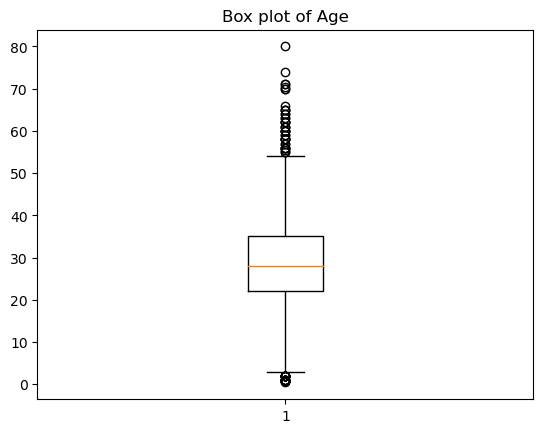

In [16]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [17]:
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')

In [18]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [19]:
IQR=Q3-Q1

In [20]:
print(IQR)

13.0


In [21]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [22]:
print(low_limit)
print(up_limit)

2.5
54.5


In [23]:
outlier=[]
for x in data['Age']:
    if((x>up_limit) or (x< low_limit)):
        outlier.append(x)


In [24]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [25]:
ind=data['Age']>up_limit
ind1=data['Age']<low_limit

In [26]:
data.loc[ind].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [27]:
data.loc[ind1].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [28]:
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880 ,8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

In [29]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,unknown,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,unknown,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,unknown,C


Text(0.5, 1.0, 'Box plot of Fare')

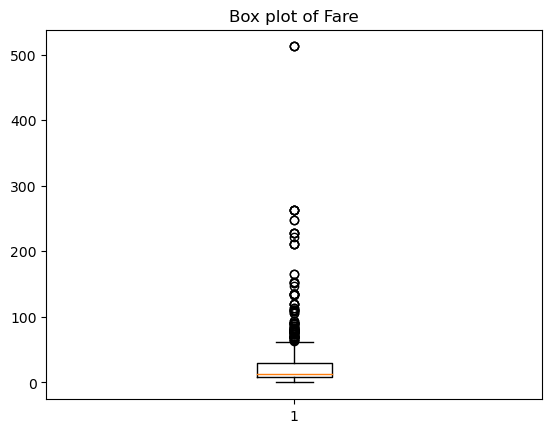

In [41]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [30]:
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')

In [31]:
print(Q1)
print(Q2)
print(Q3)

7.8958
13.4167
30.0708


In [32]:
IQR=Q3-Q1

In [33]:
print(IQR)

22.174999999999997


In [34]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [35]:
print(low_limit)
print(up_limit)

-25.366699999999994
63.333299999999994


In [36]:
outlier=[]
for x in data['Fare']:
    if((x>up_limit) or (x< low_limit)):
        outlier.append(x)


In [37]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [47]:
ind2=data['Fare']>up_limit

In [43]:
data.loc[ind2].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [49]:
data.drop(data.loc[ind2].index)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,unknown,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,unknown,S


# MinMax Scaling

In [52]:
X=data.drop(['Name','Sex','SibSp','Ticket','Cabin','Embarked'],axis=1)

In [53]:
X

,Survived,Pclass,Age,Parch,Fare
PassengerId,,,,,
1,0,3,22.0,0,7.2500
2,1,1,38.0,0,71.2833
3,1,3,26.0,0,7.9250
4,1,1,35.0,0,53.1000
5,0,3,35.0,0,8.0500
...,...,...,...,...,...
887,0,2,27.0,0,13.0000
888,1,1,19.0,0,30.0000
889,0,3,28.0,2,23.4500


In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
minmax=MinMaxScaler(feature_range=(0,1)) 

In [56]:
X1=minmax.fit_transform(X)

In [57]:
type(X1)

numpy.ndarray

In [58]:
X.columns

Index(['Survived', 'Pclass', 'Age', 'Parch', 'Fare'], dtype='object')

In [60]:
X1=pd.DataFrame(X1,columns=['Survived', 'Pclass', 'Age', 'Parch', 'Fare'])

In [61]:
X1

,Survived,Pclass,Age,Parch,Fare
0,0.0,1.0,0.372549,0.000000,0.014151
1,1.0,0.0,0.686275,0.000000,0.139136
2,1.0,1.0,0.450980,0.000000,0.015469
3,1.0,0.0,0.627451,0.000000,0.103644
4,0.0,1.0,0.627451,0.000000,0.015713
...,...,...,...,...,...
820,0.0,0.5,0.470588,0.000000,0.025374
821,1.0,0.0,0.313725,0.000000,0.058556
822,0.0,1.0,0.490196,0.333333,0.045771
823,1.0,0.0,0.450980,0.000000,0.058556


In [62]:
X1.describe()

,Survived,Pclass,Age,Parch,Fare
count,825.000000,825.000000,825.000000,825.000000,825.000000
mean,0.380606,0.670909,0.500297,0.059596,0.061452
std,0.485830,0.412048,0.199554,0.133100,0.097508
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.372549,0.000000,0.015412
50%,0.000000,1.000000,0.490196,0.000000,0.026188
75%,1.000000,1.000000,0.607843,0.000000,0.058694
max,1.000000,1.000000,1.000000,1.000000,1.000000
